In [2]:
import pandas as pd
import numpy as np
import datetime
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
import dask.dataframe as dd
from dask.multiprocessing import get
import numpy as np
import librosa
from scipy import signal
from scipy.io import wavfile
from scipy.signal import butter,filtfilt
from scipy.stats import kurtosis
import scipy.signal as signal
from scipy.integrate import simps


In [3]:
df = pd.read_csv('all_clubed.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'uuid', 'datetime', 'cough_detected', 'latitude',
       'longitude', 'age', 'gender', 'respiratory_condition',
       'fever_muscle_pain', 'status', 'quality_1', 'cough_type_1', 'dyspnea_1',
       'wheezing_1', 'stridor_1', 'choking_1', 'congestion_1', 'nothing_1',
       'diagnosis_1', 'severity_1', 'quality_2', 'cough_type_2', 'dyspnea_2',
       'wheezing_2', 'stridor_2', 'choking_2', 'congestion_2', 'nothing_2',
       'diagnosis_2', 'severity_2', 'quality_3', 'dyspnea_3', 'wheezing_3',
       'stridor_3', 'choking_3', 'congestion_3', 'nothing_3', 'cough_type_3',
       'diagnosis_3', 'severity_3', 'severity', 'cough_type', 'dyspnea',
       'wheezing', 'stridor', 'quality', 'choking', 'congestion', 'nothing',
       'diagnosis'],
      dtype='object')

In [5]:
fmp_status_df= df.dropna(subset=[ 'fever_muscle_pain', 'status'], inplace=False)[['fever_muscle_pain', 'status']]

In [6]:
temp_df = fmp_status_df.sample(n=500, random_state=69)

In [7]:
temp_df.value_counts(normalize=True)

fever_muscle_pain  status     
False              healthy        0.668
                   symptomatic    0.138
                   COVID-19       0.066
True               healthy        0.054
                   symptomatic    0.038
                   COVID-19       0.036
Name: proportion, dtype: float64

In [6]:
fmp_status_df.value_counts(normalize=True)

fever_muscle_pain  status     
False              healthy        0.690295
                   symptomatic    0.113399
True               healthy        0.066466
False              COVID-19       0.064080
True               symptomatic    0.040569
                   COVID-19       0.025190
Name: proportion, dtype: float64

In [7]:
print("Null Hypothesis (H0): There is no substantial relationship between the two variables.")  
print("Alternative Hypothesis (H1): There is a substantial relationship between variables.")


Null Hypothesis (H0): There is no substantial relationship between the two variables.
Alternative Hypothesis (H1): There is a substantial relationship between variables.


In [8]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import chi2

data = temp_df
data.shape
ct_table_ind=pd.crosstab(data['fever_muscle_pain'],data["status"])
print('contingency_table :\n',ct_table_ind)
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

alpha = 0.05
print(chi2_stat)
if p>alpha:
    print("Accept H0: There is no relation between two vairables.")
else:
    print("Reject H0: There is a realtion between two variables")

contingency_table :
 status             COVID-19  healthy  symptomatic
fever_muscle_pain                                
False                    33      334           69
True                     18       27           19
chi2 statistic:     38.369
p-value:            4.6586e-09
degrees of freedom: 2
expected frequencies:
 [[ 44.472 314.792  76.736]
 [  6.528  46.208  11.264]]
38.36909121864937
Reject H0: There is a realtion between two variables


In [9]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import chi2

data = fmp_status_df
data.shape
ct_table_ind=pd.crosstab(data['fever_muscle_pain'],data["status"])
print('contingency_table :\n',ct_table_ind)
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

alpha = 0.05
print(chi2_stat)
if p>alpha:
    print("Accept H0: There is no relation between two vairables.")
else:
    print("Reject H0: There is a realtion between two variables")


contingency_table :
 status             COVID-19  healthy  symptomatic
fever_muscle_pain                                
False                   725     7810         1283
True                    285      752          459
chi2 statistic:     606.59
p-value:            1.907e-132
degrees of freedom: 2
expected frequencies:
 [[ 876.45218314 7429.88474456 1511.6630723 ]
 [ 133.54781686 1132.11525544  230.3369277 ]]
606.5914454881297
Reject H0: There is a realtion between two variables


In [8]:
ct_table_ind.values

array([[ 670, 7325, 1175],
       [ 340, 1237,  567]])

In [9]:
n = np.sum(ct_table_ind.values)  # Total number of observations
min_dim = min(ct_table_ind.shape) - 1  # Number of categories minus 1

cramer_v = np.sqrt(chi2_stat / (n * min_dim))
print(cramer_v)

0.2315474771571572


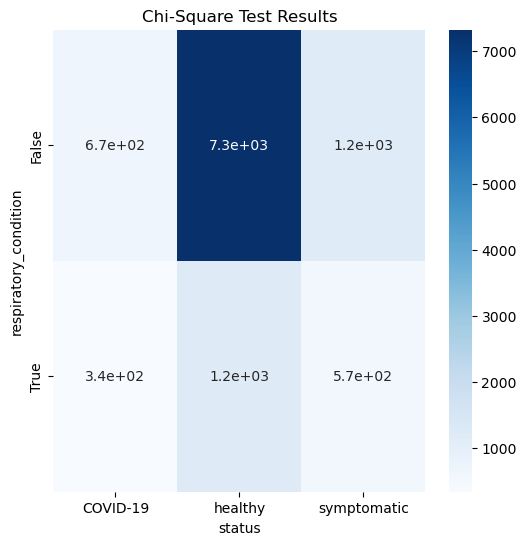

In [10]:
import seaborn as sns
fig = plt.figure(figsize=(6,6))
sns.heatmap(ct_table_ind, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

In [10]:
# import sweetviz as sv
# report = sv.analyze(gender_status_df)

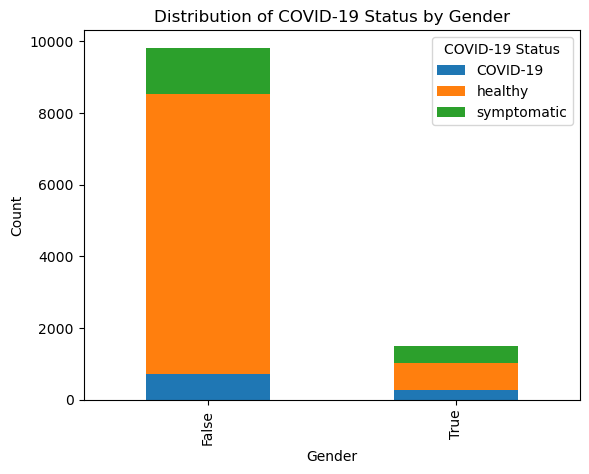

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
contingency_table = pd.crosstab(fmp_status_df['fever_muscle_pain'], fmp_status_df['status'])
contingency_table.plot(kind='bar', stacked=True)
plt.title('Distribution of COVID-19 Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='COVID-19 Status')
plt.show()
